In [271]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.feature_selection import mutual_info_classif
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

In [3]:
# import the dataset
train_df = pd.read_csv('/content/drive/MyDrive/datasets/CS_Assignment4/KDDTrain+.txt',header=None)
test_df =  pd.read_csv('/content/drive/MyDrive/datasets/CS_Assignment4/KDDTest+.txt', header=None)
# add the column labels
columns = (['duration',
            'protocol_type',
            'service',
            'flag',
            'src_bytes',
            'dst_bytes',
            'land',
            'wrong_fragment',
            'urgent',
            'hot',
            'num_failed_logins',
            'logged_in',
            'num_compromised',
            'root_shell',
            'su_attempted',
            'num_root',
            'num_file_creations',
            'num_shells',
            'num_access_files',
            'num_outbound_cmds',
            'is_host_login',
            'is_guest_login',
            'count',
            'srv_count',
            'serror_rate',
            'srv_serror_rate',
            'rerror_rate',
            'srv_rerror_rate',
            'same_srv_rate',
            'diff_srv_rate',
            'srv_diff_host_rate',
            'dst_host_count',
            'dst_host_srv_count',
            'dst_host_same_srv_rate',
            'dst_host_diff_srv_rate',
            'dst_host_same_src_port_rate',
            'dst_host_srv_diff_host_rate',
            'dst_host_serror_rate',
            'dst_host_srv_serror_rate',
            'dst_host_rerror_rate',
            'dst_host_srv_rerror_rate',
            'attack_type'])

#drop last column
train_data = train_df.drop(labels=[42], axis = 1)
test_data = test_df.drop(labels=[42], axis = 1)
# name the features
train_data.columns = columns
test_data.columns = columns
train_data.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack_type
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal


## **Data Exploration**

In [5]:
# check for null values
train_data.isnull().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

In [6]:
# feature types
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125973 entries, 0 to 125972
Data columns (total 42 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     125973 non-null  int64  
 1   protocol_type                125973 non-null  object 
 2   service                      125973 non-null  object 
 3   flag                         125973 non-null  object 
 4   src_bytes                    125973 non-null  int64  
 5   dst_bytes                    125973 non-null  int64  
 6   land                         125973 non-null  int64  
 7   wrong_fragment               125973 non-null  int64  
 8   urgent                       125973 non-null  int64  
 9   hot                          125973 non-null  int64  
 10  num_failed_logins            125973 non-null  int64  
 11  logged_in                    125973 non-null  int64  
 12  num_compromised              125973 non-null  int64  
 13 

In [7]:
# number of unique values in feature 
train_data.nunique()

duration                       2981
protocol_type                     3
service                          70
flag                             11
src_bytes                      3341
dst_bytes                      9326
land                              2
wrong_fragment                    3
urgent                            4
hot                              28
num_failed_logins                 6
logged_in                         2
num_compromised                  88
root_shell                        2
su_attempted                      3
num_root                         82
num_file_creations               35
num_shells                        3
num_access_files                 10
num_outbound_cmds                 1
is_host_login                     2
is_guest_login                    2
count                           512
srv_count                       509
serror_rate                      89
srv_serror_rate                  86
rerror_rate                      82
srv_rerror_rate             

In [8]:
# add another column with normal to 0, all attacks to 1
is_attack = train_data.attack_type.map(lambda a: 0 if a == 'normal' else 1)
train_data['is_attack'] = is_attack
is_attack = test_data.attack_type.map(lambda a: 0 if a == 'normal' else 1)
test_data['is_attack'] = is_attack
train_data.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack_type,is_attack
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,0
1,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,0
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,1
3,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,0
4,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,0


### Entrestanding the data

In [237]:
# describe first 10 features
train_data.iloc[:,:15].describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted
count,125973.00000,1.259730e+05,1.259730e+05,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000
mean,287.14465,4.556674e+04,1.977911e+04,0.000198,0.022687,0.000111,0.204409,0.001222,0.395736,0.279250,0.001342,0.001103
std,2604.51531,5.870331e+06,4.021269e+06,0.014086,0.253530,0.014366,2.149968,0.045239,0.489010,23.942042,0.036603,0.045154
min,0.00000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.00000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.00000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.00000,2.760000e+02,5.160000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,42908.00000,1.379964e+09,1.309937e+09,1.000000,3.000000,3.000000,77.000000,5.000000,1.000000,7479.000000,1.000000,2.000000


In [238]:
# describe first 15-30 features
train_data.iloc[:,15:30].describe()

,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate
count,125973.000000,125973.000000,125973.000000,125973.000000,125973.0,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000
mean,0.302192,0.012669,0.000413,0.004096,0.0,0.000008,0.009423,84.107555,27.737888,0.284485,0.282485,0.119958,0.121183,0.660928,0.063053
std,24.399618,0.483935,0.022181,0.099370,0.0,0.002817,0.096612,114.508607,72.635840,0.446456,0.447022,0.320436,0.323647,0.439623,0.180314
min,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.090000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,14.000000,8.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,143.000000,18.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.060000
max,7468.000000,43.000000,2.000000,9.000000,0.0,1.000000,1.000000,511.000000,511.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [239]:
# describe first all remaining features
train_data.iloc[:,30:].describe()

,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,is_attack,attack_label
count,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000
mean,0.097322,182.148945,115.653005,0.521242,0.082951,0.148379,0.032542,0.284452,0.278485,0.118832,0.120240,0.465417,0.582252
std,0.259830,99.206213,110.702741,0.448949,0.188922,0.308997,0.112564,0.444784,0.445669,0.306557,0.319459,0.498805,0.724655
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,82.000000,10.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,255.000000,63.000000,0.510000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,255.000000,255.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000


In [15]:
# group the attacks into 4 categories dos, prob, u2r, and u2l

dos = ['apache2','back','land','neptune','mailbomb','pod','processtable','smurf','teardrop','udpstorm','worm']
probe = ['ipsweep','mscan','nmap','portsweep','saint','satan']
u2r = ['buffer_overflow','loadmdoule','perl','ps','rootkit','sqlattack','xterm']
r2l = ['ftp_write','guess_passwd','http_tunnel','imap','multihop','named','phf','sendmail',
       'snmpgetattack','snmpguess','spy','warezclient','warezmaster','xclock','xsnoop']

attack_labels = {0:'Normal',1:'dos',2:'probe',3:'u2r',4:'r2l'}

def map_attack(attack):
    if attack in dos:
        # dos map to 1
        attack_label = 1
    elif attack in probe:
        # probe map to 2
        attack_label = 2
    elif attack in u2r:
        # u2r map to 3
        attack_label = 3
    elif attack in r2l:
        # u2l map to 4
        attack_label = 4
    else:
        # normal maps to 0
        attack_label = 0
        
    return attack_label

attack_label = train_data.attack_type.apply(map_attack)
train_data['attack_label'] = attack_label

attack_label = test_data.attack_type.apply(map_attack)
test_data['attack_label'] = attack_label

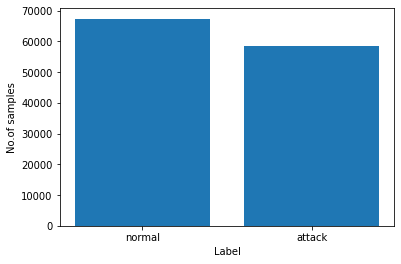

In [20]:
# check for imbalance among normal and attack
count = dict(train_data.is_attack.value_counts())
plt.bar(['normal','attack'],count.values())
plt.xlabel('Label')
plt.ylabel('No.of samples')
plt.show()

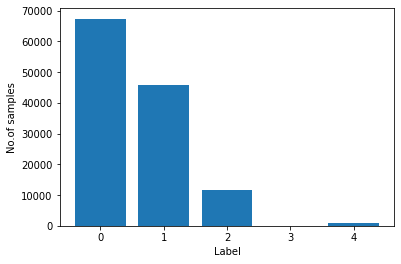

In [21]:
# check imbalance among all classes 
count_labels = dict(train_data.attack_label.value_counts())
plt.bar(count_labels.keys(),count_labels.values())
plt.xlabel('Label')
plt.ylabel('No.of samples')
plt.show()

### Balancing the dataset

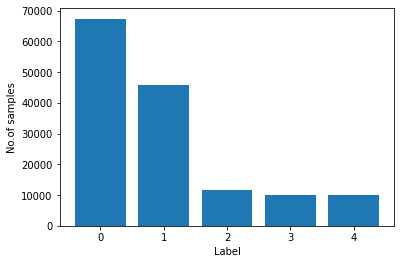

In [278]:
class_0 = train_data[train_data['attack_label'] == 0]
class_1 = train_data[train_data['attack_label'] == 1]
class_2 = train_data[train_data['attack_label'] == 2]
class_3 = train_data[train_data['attack_label'] == 3]
class_4 = train_data[train_data['attack_label'] == 4]

# up sample class 3 and class 4
class_3_over = class_3.sample(10000,replace=True) 
class_4_over = class_4.sample(10000,replace=True)

train_sampled = pd.concat([class_0,class_1,class_2,class_3_over, class_4_over], axis=0)

# balanced counts 
count_labels = dict(train_sampled.attack_label.value_counts())
plt.bar(count_labels.keys(),count_labels.values())
plt.xlabel('Label')
plt.ylabel('No.of samples')
plt.show()

### Data preprocessing and feature selection - 1

In [281]:
# get training features and labels
X = train_data.iloc[:,:-3]
y = train_data.iloc[:,-1]
X_test = test_data.iloc[:,:-3]
y_test = test_data.iloc[:,-1]

# labeencode the categorical feature
label_encoder = LabelEncoder()
label_encoder.fit(X.protocol_type)
X['protocol_type'] = label_encoder.transform(X.protocol_type)
X_test['protocol_type'] = label_encoder.transform(X_test.protocol_type)

label_encoder.fit(X.service)
X['service'] = label_encoder.transform(X.service)
X_test['service'] = label_encoder.transform(X_test.service)

label_encoder.fit(X.flag)
X['flag'] = label_encoder.transform(X.flag)
X_test['flag'] = label_encoder.transform(X_test.flag)

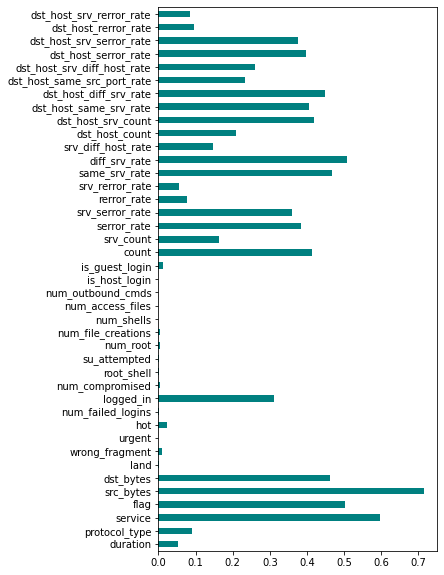

In [282]:
# feature selection by mutual information
importances = mutual_info_classif(X, y)
feature_importance = pd.Series(importances, list(X.columns))
plt.figure(figsize=(5,10))
feature_importance.plot(kind='barh',color='teal')
plt.show()

In [283]:
# remove features with mutual infomation below 0.1
imp_feature = list(feature_importance[feature_importance > 0.1].index)
imp_feature.extend(['attack_type','is_attack','attack_label'])

train_selected = train_sampled.loc[:,imp_feature]
test_selected = test_data.loc[:,imp_feature]

# define new features
X_train = train_selected.iloc[:,:-3]
y_train = train_selected.iloc[:,-1]

X_test = test_selected.iloc[:,:-3]
y_test = test_selected.iloc[:,-1]


In [173]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 144935 entries, 0 to 36709
Data columns (total 20 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   service                      144935 non-null  object 
 1   flag                         144935 non-null  object 
 2   src_bytes                    144935 non-null  int64  
 3   dst_bytes                    144935 non-null  int64  
 4   logged_in                    144935 non-null  int64  
 5   count                        144935 non-null  int64  
 6   srv_count                    144935 non-null  int64  
 7   serror_rate                  144935 non-null  float64
 8   srv_serror_rate              144935 non-null  float64
 9   same_srv_rate                144935 non-null  float64
 10  diff_srv_rate                144935 non-null  float64
 11  srv_diff_host_rate           144935 non-null  float64
 12  dst_host_count               144935 non-null  int64  
 13  

In [284]:
# do label encode categorical features
label_encoder.fit(X_train.service)
X_train['service'] = label_encoder.transform(X_train.service)
X_test['service'] = label_encoder.transform(X_test.service)

label_encoder.fit(X_train.flag)
X_train['flag'] = label_encoder.transform(X_train.flag)
X_test['flag'] = label_encoder.transform(X_test.flag)


### Training with different models

### Decision Tree

In [285]:
# train and predict 
dt_clf = DecisionTreeClassifier(random_state=1)
dt_clf.fit(X_train,y_train)

y_pred = dt_clf.predict(X_test)

#plot classification report
clf_report = classification_report(y_test, y_pred)
print(clf_report)

              precision    recall  f1-score   support

           0       0.64      0.93      0.76      9855
           1       0.95      0.73      0.83      7460
           2       0.67      0.68      0.68      2421
           3       0.20      0.05      0.07        65
           4       0.80      0.01      0.03      2743

    accuracy                           0.72     22544
   macro avg       0.65      0.48      0.47     22544
weighted avg       0.76      0.72      0.68     22544



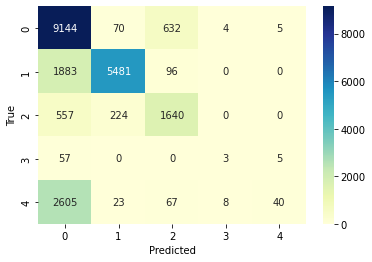

In [286]:
# plot confusion matrix
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(data=cm,xticklabels = [0,1,2,3,4],yticklabels = [0,1,2,3,4],cmap="YlGnBu",fmt='d',annot=True)
plt.xlabel("Predicted")
plt.ylabel('True')
plt.show()

### Random Forest

In [188]:
# train and predict 
rf_clf = RandomForestClassifier(random_state=1)
rf_clf.fit(X_train,y_train)

y_pred = rf_clf.predict(X_test)

#plot classification report
clf_report = classification_report(y_test, y_pred)
print(clf_report)

              precision    recall  f1-score   support

           0       0.66      0.97      0.78      9855
           1       0.96      0.81      0.88      7460
           2       0.86      0.60      0.70      2421
           3       0.43      0.05      0.08        65
           4       0.78      0.01      0.01      2743

    accuracy                           0.76     22544
   macro avg       0.74      0.49      0.49     22544
weighted avg       0.79      0.76      0.71     22544



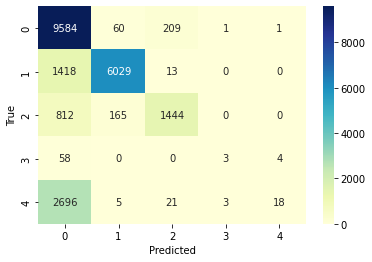

In [189]:
# plot confusion matrix
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(data=cm,xticklabels = [0,1,2,3,4],yticklabels = [0,1,2,3,4],cmap="YlGnBu",fmt='d',annot=True)
plt.xlabel("Predicted")
plt.ylabel('True')
plt.show()

### XG Boost

In [190]:
xgb_clf = XGBClassifier()
xgb_clf.fit(X_train, y_train)
y_pred = xgb_clf.predict(X_test)

# print classificaion report
clf_report = classification_report(y_test, y_pred)
print(clf_report)

              precision    recall  f1-score   support

           0       0.69      0.97      0.80      9855
           1       0.96      0.84      0.90      7460
           2       0.77      0.60      0.68      2421
           3       0.19      0.18      0.19        65
           4       0.98      0.06      0.11      2743

    accuracy                           0.77     22544
   macro avg       0.72      0.53      0.53     22544
weighted avg       0.82      0.77      0.73     22544



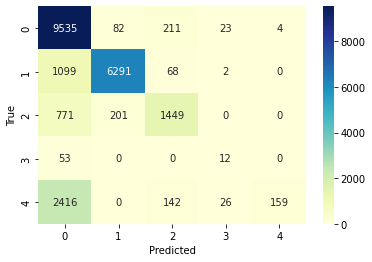

In [192]:
# plot confusion matrix
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(data=cm,xticklabels = [0,1,2,3,4],yticklabels = [0,1,2,3,4],cmap="YlGnBu",fmt='d',annot=True)
plt.xlabel("Predicted")
plt.ylabel('True')
plt.show()

### Neural Networks 

In [206]:
# get previously selected features with mutual information
train_selected = train_sampled.loc[:,imp_feature]
test_selected = test_data.loc[:,imp_feature]
train_selected.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 144935 entries, 0 to 36709
Data columns (total 23 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   service                      144935 non-null  object 
 1   flag                         144935 non-null  object 
 2   src_bytes                    144935 non-null  int64  
 3   dst_bytes                    144935 non-null  int64  
 4   logged_in                    144935 non-null  int64  
 5   count                        144935 non-null  int64  
 6   srv_count                    144935 non-null  int64  
 7   serror_rate                  144935 non-null  float64
 8   srv_serror_rate              144935 non-null  float64
 9   same_srv_rate                144935 non-null  float64
 10  diff_srv_rate                144935 non-null  float64
 11  srv_diff_host_rate           144935 non-null  float64
 12  dst_host_count               144935 non-null  int64  
 13  

In [207]:
train_selected.nunique()

service                          70
flag                             11
src_bytes                      3341
dst_bytes                      9326
logged_in                         2
count                           512
srv_count                       509
serror_rate                      89
srv_serror_rate                  86
same_srv_rate                   101
diff_srv_rate                    95
srv_diff_host_rate               60
dst_host_count                  256
dst_host_srv_count              256
dst_host_same_srv_rate          101
dst_host_diff_srv_rate          101
dst_host_same_src_port_rate     101
dst_host_srv_diff_host_rate      75
dst_host_serror_rate            101
dst_host_srv_serror_rate        100
attack_type                      23
is_attack                         2
attack_label                      5
dtype: int64

In [208]:
# log normalize the integer features having large range of values 
norm_cols = [ 'src_bytes', 'dst_bytes', 'count', 'srv_count', 'dst_host_count', 'dst_host_srv_count']

for col in norm_cols:
  train_selected[col] = np.log(train_selected[col]+1e-6)
  test_selected[col] = np.log(test_selected[col]+1e-6)

In [209]:
train_selected.head()

,service,flag,src_bytes,dst_bytes,logged_in,count,srv_count,serror_rate,srv_serror_rate,same_srv_rate,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,attack_type,is_attack,attack_label
0,ftp_data,SF,6.196444,-13.815511,0,0.693148,6.931477e-01,0.0,0.0,1.00,...,3.218876e+00,0.17,0.03,0.17,0.00,0.00,0.00,normal,0,0
1,other,SF,4.983607,-13.815511,0,2.564949,9.999995e-07,0.0,0.0,0.08,...,9.999995e-07,0.00,0.60,0.88,0.00,0.00,0.00,normal,0,0
3,http,SF,5.446737,9.006141,1,1.609438,1.609438e+00,0.2,0.2,1.00,...,5.541264e+00,1.00,0.00,0.03,0.04,0.03,0.01,normal,0,0
4,http,SF,5.293305,6.040255,1,3.401197,3.465736e+00,0.0,0.0,1.00,...,5.541264e+00,1.00,0.00,0.00,0.00,0.00,0.00,normal,0,0
12,http,SF,5.659482,7.719130,1,1.098613,1.945910e+00,0.0,0.0,1.00,...,5.389072e+00,1.00,0.00,0.12,0.03,0.00,0.00,normal,0,0


In [210]:
# onehot encode categorical features 
train_selected['train']= 1                                                                       
test_selected['train']= 0                                                                         

joined_df = pd.concat([train_selected, test_selected])  

service_dummies = pd.get_dummies(joined_df['service'], prefix='service')                    
flag_dummies = pd.get_dummies(joined_df['flag'], prefix='flag')   

joined_df = pd.concat([joined_df,service_dummies, flag_dummies], axis=1) 

train_processed = joined_df[joined_df['train']==1] 
test_processed = joined_df[joined_df['train']==0]

drop_cols = ['train', 'service', 'flag','attack_type','is_attack']                                    

train_processed.drop(drop_cols, axis=1, inplace=True)                                           
test_processed.drop(drop_cols, axis=1, inplace=True) 

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [251]:
# plot confusion matrix
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(data=cm,xticklabels = [0,1,2,3,4],yticklabels = [0,1,2,3,4],cmap="YlGnBu",fmt='d',annot=True)
plt.xlabel("Predicted")
plt.ylabel('True')
plt.show()

In [211]:
train_processed.head()

,src_bytes,dst_bytes,logged_in,count,srv_count,serror_rate,srv_serror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,...,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH
0,6.196444,-13.815511,0,0.693148,6.931477e-01,0.0,0.0,1.00,0.00,0.00,...,0,0,0,0,0,0,0,0,1,0
1,4.983607,-13.815511,0,2.564949,9.999995e-07,0.0,0.0,0.08,0.15,0.00,...,0,0,0,0,0,0,0,0,1,0
3,5.446737,9.006141,1,1.609438,1.609438e+00,0.2,0.2,1.00,0.00,0.00,...,0,0,0,0,0,0,0,0,1,0
4,5.293305,6.040255,1,3.401197,3.465736e+00,0.0,0.0,1.00,0.00,0.09,...,0,0,0,0,0,0,0,0,1,0
12,5.659482,7.719130,1,1.098613,1.945910e+00,0.0,0.0,1.00,0.00,0.43,...,0,0,0,0,0,0,0,0,1,0


In [215]:
# define features and labels
y = train_processed.loc[:,['attack_label']]
X = train_processed.drop(['attack_label'],axis=1)

y_test = test_processed.loc[:,['attack_label']]
X_test = test_processed.drop(['attack_label'],axis=1)

# split train data into train and validation
X_train, X_valid, y_train, y_valid = train_test_split(X,y,test_size=0.3)

In [216]:
import tensorflow as tf
from keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from keras.layers import Dense, Dropout
from keras.utils import np_utils

# onehot encode the output labels
y_train = np_utils.to_categorical(y_train)
y_valid = np_utils.to_categorical(y_valid)
y_test = np_utils.to_categorical(y_test)

y_train.shape,y_valid.shape,y_test.shape,

((101454, 5), (43481, 5), (22544, 5))

In [217]:
# get input size
input_size = len(X_train.columns)

# define neuralnetwork model
model = Sequential()
model.add(Dense(256, input_dim=input_size, activation='softplus'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(5, activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer=Adam(learning_rate=0.001),metrics=['accuracy'])

In [218]:
# train the model
model.fit(X_train, y_train, 
               epochs=50, 
               batch_size=2500,
               validation_data=(X_valid, y_valid))

Epoch 1/50
41/41 [==============================] - 2s 41ms/step - loss: 0.6439 - accuracy: 0.7806 - val_loss: 0.3282 - val_accuracy: 0.9186
Epoch 2/50
41/41 [==============================] - 1s 36ms/step - loss: 0.2503 - accuracy: 0.9306 - val_loss: 0.1952 - val_accuracy: 0.9406
Epoch 3/50
41/41 [==============================] - 1s 35ms/step - loss: 0.1606 - accuracy: 0.9537 - val_loss: 0.1290 - val_accuracy: 0.9641
Epoch 4/50
41/41 [==============================] - 1s 35ms/step - loss: 0.1131 - accuracy: 0.9666 - val_loss: 0.0983 - val_accuracy: 0.9695
Epoch 5/50
41/41 [==============================] - 1s 35ms/step - loss: 0.0913 - accuracy: 0.9720 - val_loss: 0.0833 - val_accuracy: 0.9756
Epoch 6/50
41/41 [==============================] - 1s 35ms/step - loss: 0.0809 - accuracy: 0.9753 - val_loss: 0.0704 - val_accuracy: 0.9774
Epoch 7/50
41/41 [==============================] - 2s 37ms/step - loss: 0.0688 - accuracy: 0.9783 - val_loss: 0.0624 - val_accuracy: 0.9810
Epoch 8/50
41

In [231]:
# predict the label and get class from probabilities
y = model.predict(X_test)
class_labels = [0,1,2,3,4]
y_pred = []
for i in range(len(y)):
  y_pred.append(class_labels[np.argmax(y[i])])

y_test = test_processed.loc[:,['attack_label']]

In [232]:
# print classification report
clf_report = classification_report(y_test, y_pred)
print(clf_report)

              precision    recall  f1-score   support

           0       0.69      0.92      0.79      9855
           1       0.96      0.84      0.89      7460
           2       0.67      0.63      0.65      2421
           3       0.21      0.15      0.18        65
           4       0.83      0.14      0.24      2743

    accuracy                           0.77     22544
   macro avg       0.67      0.54      0.55     22544
weighted avg       0.79      0.77      0.74     22544



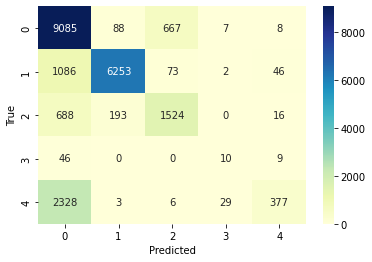

In [233]:
# plot confusion matrix
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(data=cm,xticklabels = [0,1,2,3,4],yticklabels = [0,1,2,3,4],cmap="YlGnBu",fmt='d',annot=True)
plt.xlabel("Predicted")
plt.ylabel('True')
plt.show()

## Feature Selection with Correlation Coefficient

In [287]:
train_sampled.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack_type,is_attack,attack_label
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,0,0
1,0,udp,other,SF,146,0,0,0,0,0,...,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,0,0
3,0,tcp,http,SF,232,8153,0,0,0,0,...,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,0,0
4,0,tcp,http,SF,199,420,0,0,0,0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,0,0
12,0,tcp,http,SF,287,2251,0,0,0,0,...,0.00,0.12,0.03,0.00,0.00,0.00,0.00,normal,0,0


In [288]:
data_temp = train_sampled.drop(['protocol_type','service','flag'],axis=1)

corr= data_temp.corr()
corr_y = abs(corr['attack_label'])
highest_corr = corr_y[corr_y > 0.1]
highest_corr.sort_values(ascending=True)

dst_host_diff_srv_rate         0.101770
num_shells                     0.117156
srv_count                      0.126185
dst_host_same_srv_rate         0.127077
num_file_creations             0.129601
num_failed_logins              0.135942
dst_host_count                 0.184139
dst_host_srv_diff_host_rate    0.203685
is_guest_login                 0.306158
root_shell                     0.327852
hot                            0.369267
dst_host_same_src_port_rate    0.462938
dst_host_srv_count             0.543337
is_attack                      0.745698
attack_label                   1.000000
Name: attack_label, dtype: float64

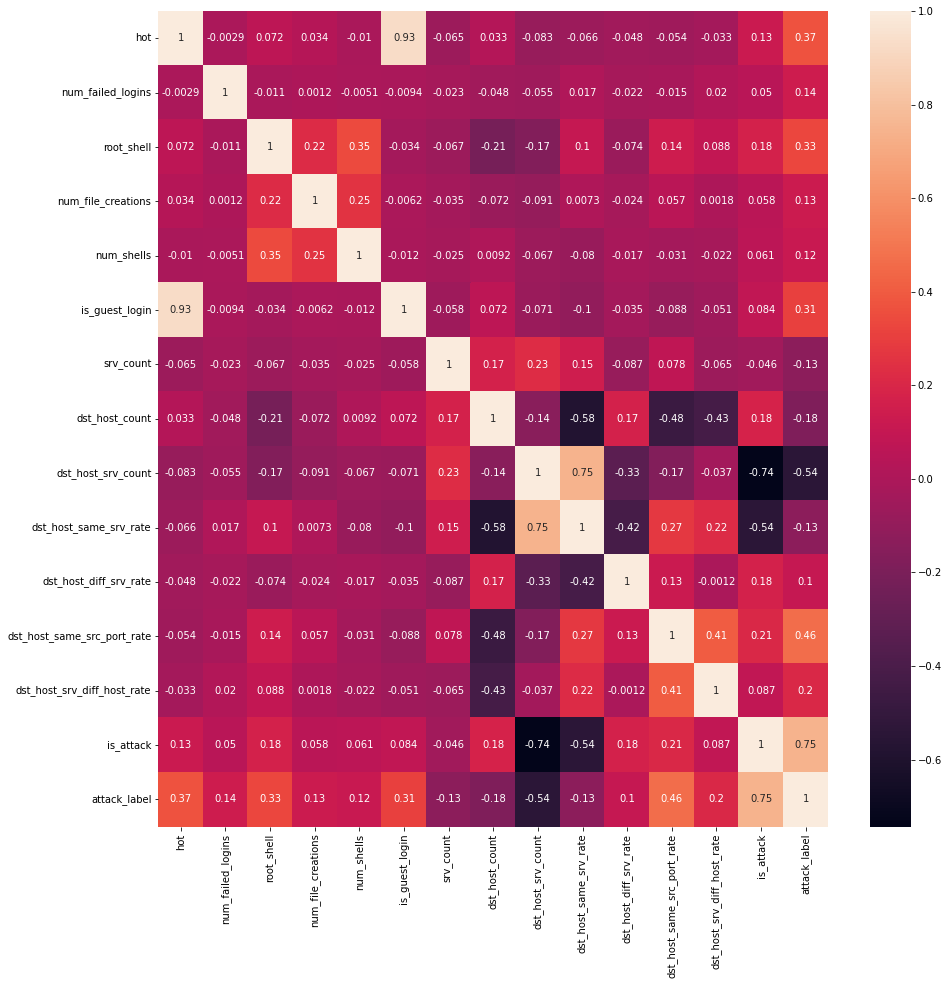

In [289]:
highest_corr_columns= highest_corr.index
plt.figure(figsize=(15,15))
sns.heatmap(data_temp[highest_corr.index].corr(),annot=True)
plt.show()

In [290]:
# important columns along with categorical features
imp_feature = ['protocol_type'
,'service'
,'flag'
,'hot'
,'duration'
,'dst_host_count'                
,'dst_host_srv_diff_host_rate'   
,'diff_srv_rate'                
,'dst_host_rerror_rate'          
,'rerror_rate'                    
,'srv_rerror_rate'                
,'dst_host_srv_rerror_rate'      
,'dst_host_same_src_port_rate'   
,'srv_serror_rate'              
,'serror_rate'                    
,'dst_host_serror_rate'           
,'dst_host_srv_serror_rate'       
,'count'                         
,'dst_host_diff_srv_rate'        
,'same_srv_rate'                  
,'dst_host_same_srv_rate'         
,'logged_in'                      
,'dst_host_srv_count'            
,'is_attack'                     
,'attack_label']

In [292]:
# select important features 
train_new = train_sampled.loc[:,imp_feature]
test_new = test_data.loc[:,imp_feature]

In [293]:
# onehot encode categorical features 
train_new['train']= 1                                                                       
test_new['train']= 0                                                                         

joined_df = pd.concat([train_new, test_new])  

protocol_dummies = pd.get_dummies(joined_df['protocol_type'], prefix='protocol_type')
service_dummies = pd.get_dummies(joined_df['service'], prefix='service')                    
flag_dummies = pd.get_dummies(joined_df['flag'], prefix='flag')   

joined_df = pd.concat([joined_df,protocol_dummies,service_dummies, flag_dummies], axis=1) 

train_processed = joined_df[joined_df['train']==1] 
test_processed = joined_df[joined_df['train']==0]

drop_cols = ['train', 'protocol_type','service', 'flag','is_attack']                                    

train_processed.drop(drop_cols, axis=1, inplace=True)                                           
test_processed.drop(drop_cols, axis=1, inplace=True) 

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [294]:
# define features and labels
y_train = train_processed.loc[:,['attack_label']]
X_train = train_processed.drop(['attack_label'],axis=1)

y_test = test_processed.loc[:,['attack_label']]
X_test = test_processed.drop(['attack_label'],axis=1)

### Train and test with different models

### Decision tree

In [295]:
# train and predict 
dt_clf = DecisionTreeClassifier(random_state=1)
dt_clf.fit(X_train,y_train)

y_pred = dt_clf.predict(X_test)

#plot classification report
clf_report = classification_report(y_test, y_pred)
print(clf_report)

              precision    recall  f1-score   support

           0       0.71      0.97      0.82      9855
           1       0.96      0.74      0.84      7460
           2       0.63      0.61      0.62      2421
           3       0.33      0.03      0.06        65
           4       0.78      0.28      0.41      2743

    accuracy                           0.77     22544
   macro avg       0.68      0.53      0.55     22544
weighted avg       0.79      0.77      0.75     22544



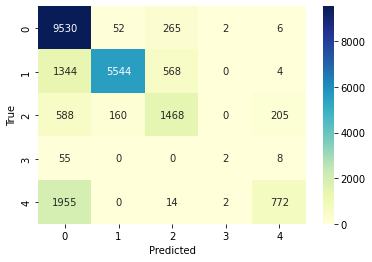

In [296]:
# plot confusion matrix
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(data=cm,xticklabels = [0,1,2,3,4],yticklabels = [0,1,2,3,4],cmap="YlGnBu",fmt='d',annot=True)
plt.xlabel("Predicted")
plt.ylabel('True')
plt.show()

### Random Forest

In [297]:
# train and predict 
rf_clf = RandomForestClassifier(random_state=1)
rf_clf.fit(X_train,y_train)

y_pred = rf_clf.predict(X_test)

#plot classification report
clf_report = classification_report(y_test, y_pred)
print(clf_report)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


              precision    recall  f1-score   support

           0       0.66      0.97      0.78      9855
           1       0.96      0.74      0.83      7460
           2       0.81      0.65      0.72      2421
           3       0.27      0.05      0.08        65
           4       0.97      0.11      0.19      2743

    accuracy                           0.75     22544
   macro avg       0.73      0.50      0.52     22544
weighted avg       0.81      0.75      0.72     22544



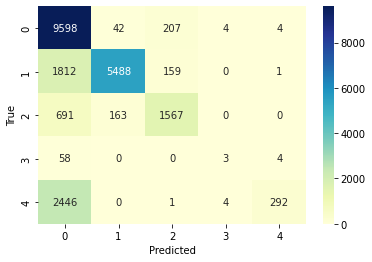

In [298]:
# plot confusion matrix
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(data=cm,xticklabels = [0,1,2,3,4],yticklabels = [0,1,2,3,4],cmap="YlGnBu",fmt='d',annot=True)
plt.xlabel("Predicted")
plt.ylabel('True')
plt.show()

### XG Boost

In [299]:
xgb_clf = XGBClassifier()
xgb_clf.fit(X_train, y_train)
y_pred = xgb_clf.predict(X_test)

# print classificaion report
clf_report = classification_report(y_test, y_pred)
print(clf_report)

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


              precision    recall  f1-score   support

           0       0.66      0.97      0.79      9855
           1       0.96      0.76      0.85      7460
           2       0.86      0.58      0.69      2421
           3       0.21      0.20      0.20        65
           4       0.88      0.15      0.25      2743

    accuracy                           0.76     22544
   macro avg       0.71      0.53      0.56     22544
weighted avg       0.81      0.76      0.73     22544



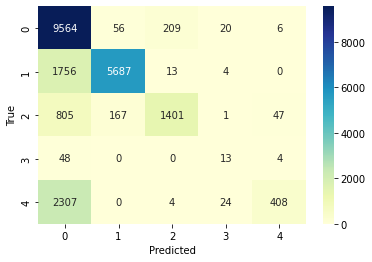

In [300]:
# plot confusion matrix
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(data=cm,xticklabels = [0,1,2,3,4],yticklabels = [0,1,2,3,4],cmap="YlGnBu",fmt='d',annot=True)
plt.xlabel("Predicted")
plt.ylabel('True')
plt.show()